In [72]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [198]:
N = 10**5
n_iters = 2000
# The gaussians seem to keep moving!

In [233]:
#g = lambda : tf.constant(np.random.normal(size=[N,]))
#g = lambda : tf.constant(np.random.uniform(0, 1, size=[N,]))
#g = lambda : tf.constant(np.random.gumbel(size=[N,]))
g = lambda : tf.constant(np.random.rayleigh(size=[N,]))

#cg = lambda : tf.complex(g(), g())
cg = lambda : tf.complex(g(), 0*g())

x = tf.complex(
    tf.Variable(np.random.normal(size=[N,])),
    tf.Variable(np.random.normal(size=[N,])),
)               

In [242]:
#poly =  cg()*x**6 + cg()*x**5 + cg()*x**4 + cg()*x**3 + cg()*x**2 + cg()
n_poly = 10

coeffs = [cg() for _ in range(n_poly+1)]
poly = tf.math.polyval(coeffs, x)

#poly =  cg()*x**3 + cg()*x**2 + cg()*x + cg()


term_error = tf.abs(poly)
loss = tf.reduce_sum(term_error)

In [243]:
opt = tf.train.AdamOptimizer(0.0025)
train_op = opt.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [244]:
result, sols = [], []
for n in tqdm(range(n_iters)):
    _, lx = sess.run([train_op, loss])
    result.append(lx)
   
#result = np.array(result)
#sols = np.array(sols)
lx, tx = sess.run([loss, term_error])
print(lx/N)

convergence = sess.run(term_error)
idx = convergence < 0.001
"Fraction converged", idx.mean()

100%|██████████| 2000/2000 [00:24<00:00, 83.18it/s]


25.26411892631903


('Fraction converged', 0.28543)

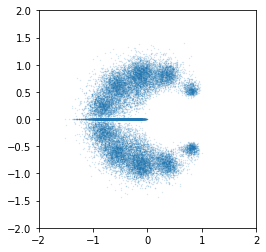

In [245]:
import pylab as plt
pts = sess.run(x)[idx]
plt.scatter(pts.real, pts.imag, s=0.1,alpha=0.25)
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()